# Introduction to Machine Learning

This notebook provides an introduction to machine learning and walks through how to develop workflows for training machine learning models.

This lesson is prepared by:
- [Kevin Chai](http://computation.curtin.edu.au/about/computational-specialists/health-sciences/)
- [Rebecca Lange](http://computation.curtin.edu.au/about/computational-specialists/humanities/)

from the [Curtin Institute for Computation](http://computation.curtin.edu.au) at Curtin University in Perth, Australia.

Some of the materials in this notebook have been referenced and adapted from:
- [Randal Olsen's Data Science Notebook](https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/tree/master/example-data-science-notebook)
- [Sebastian Raschka's Python Machine Learning Notebooks](https://github.com/rasbt/python-machine-learning-book)
- [Kevin Markham's Scikit Learn Notebooks](https://github.com/justmarkham/scikit-learn-videos)

Make sure to open this notebook in the root directory of the code repository.

This work is made available under the [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

## Table of contents

1. [Introduction](#1.-Introduction)
2. [Problem definition](#2.-Problem definition)
3. [Data cleaning](#3.-Data-cleaning)
4. [Exploratory analysis](#4.-Exploratory-analysis)
5. [Data preparation](#5.-Data-preparation)
6. [Classification](#6.-Classification)
7. [Regression](#7.-Regression)
8. [Clustering](#8.-Clustering)
9. [Dimensionality reduction](#9.-Dimensionality-reduction)
10. [Reproducibility](#10.-Reproducibility)
11. [Conclusions](#11.-Conclusions)
12. [Further reading](#12.-Further-reading)

## 1. Introduction

### Required libraries

[[ go back to the top ]](#Table-of-contents)

This notebook uses several Python packages that come standard with the [Anaconda Python distribution](http://continuum.io/downloads). The primary libraries that we'll be using are:

* **NumPy**: a fast numerical array structure and helper functions.
* **pandas**: a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: a machine learning package.
* **matplotlib**: a basic plotting library; most other plotting libraries are built on top of it.
* **seaborn**: a advanced statistical plotting library.

To make sure you have all of the packages you need, install them with `conda`:

    conda install numpy pandas scikit-learn matplotlib seaborn

`conda` may ask you to update some of the packages if you don't have the most recent version. Allow it to do so.

Alternatively, if you can install the packages with [pip](https://pip.pypa.io/en/stable/installing/) (a Python package manager):

    pip install numpy pandas scikit-learn matplotlib seaborn


### Machine learning

[[ go back to the top ]](#Table-of-contents)

Machine learning refers to algorithms that learn from examples and experiences (data). These algorithms often perform better than explicitly hard coded rules for complex tasks. i.e. where it is difficult to describe precise rules.

We will explore two types of machine learning algorithms in this notebook:

**1. Supervised Learning** 
* make predictions using data
* There is an outcome we are trying to predict
* Example: Is an e-mail spam or ham?

![Spam filter](images/spam_filter.png)
<div style="text-align:center;font-weight:bold">Figure: Classification example</div>

The workflow for developing and deploying a supervised machine learning model is shown below.

![Supervised Learning Workflow](images/supervised_learning_workflow.jpg)
<div style="text-align:center;font-weight:bold">Figure: Supervised learning workflow</div>

**2. Unsupervised Learning**
* Extract structure from data
* There is no "right answer"
* Example: Segment grocery store shoppers into clusters that exhibit similar behaviours

![Clustering](images/clustering.png)
<div style="text-align:center;font-weight:bold">Figure: Clustering example</div>

The unsupervised learning workflow is illustrated in  the figure below. Observe that no labels are used for training. 

![Unsupervised Learning Workflow](images/unsupervised_learning_workflow.png)

## 2. Problem definition

### Domain

[[ go back to the top ]](#Table-of-contents)

We have been tasked to develop a machine learning model to classify galaxies by their morphology (appearance) from a dataset containing measurements such as:

- redshift
- magnitude in _ugriz_ bands
- exponential scale radius and ellipticity
- de Vaucouleurs scale radius and ellipticity
- stellar mass
- ...
- etc.

Galaxies in the dataset have labels taken from [Galaxy Zoo](https://www.galaxyzoo.org/) DR1 - Table 2. Galaxy Zoo is described in Lintott et al. 2008, MNRAS, 389, 1179 and the data release is described in Lintott et al. 2011, 410, 166. 

We use the final debiased labels to categorise a galaxy as:

- spiral
- elliptical

![Galaxies](images/spiral_ellipse_galaxies.jpg)

<div style="text-align:center;font-weight:bold">Figure: A spiral galaxy (left) and elliptical galaxy (right)</div>

Our goal is to train a model that can accurately classify galaxies. We want our model to generalise well. i.e. it can correctly classify unseen galaxies (i.e. galaxies not in our training dataset).

### Definition

[[ go back to the top ]](#Table-of-contents)

The first step of developing a machine learning model is to clearly understand and define the problem we want to solve. Here are some useful questions to ask. 

#### Does the dataset contain labels?

Yes, the dataset contains galaxy morphology labels (spiral and elliptical). Therefore, we can use supervised learning methods to utilise the labelled data.

#### What is the type of problem?

We want to classify galaxies by their morphology so this is a classification problem.

#### What metric can be used to evaluate the model?

Since we are performing classification, we can use a classification metric such as [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) to evaluate and quantify the performance of our model. Accuracy is the percentage of correctly classified galaxies. As a challenge, we have been asked to develop a model that achieves ≥ 70% accuracy. Is this feasible? How can we find out?

#### Can the question actually be answered with the available data?

Yes, the dataset contains labels of the galaxy types we want to classify. i.e. `{spiral, elliptical}`. If we were asked to develop a model to detect other types of galaxies then we would need to collect data and labels for these other types.

#### Are there problem and application requirements we need to consider?

How will the model be used after it has been developed? Are there requirements for the model to be used on specific devices? e.g. personal computers, smart phones, embedded systems and/or servers. For the purpose of this lesson, we can assume that it is fine to train and run the model on our personal computers. However, this may not always be the case and it is something to consider if we are required to deploy our models to systems with limited compute and memory resources (e.g. embedded systems). In these instances, we may be restricted to build small, less complex and fast models at the cost of reduced performance (e.g. accuracy).

<hr />

**Thinking about and documenting the problem we're working on is an important step to performing effective machine learning (and data analysis in general) that sometimes gets overlooked.**

## 3. Data cleaning

[[ go back to the top ]](#Table-of-contents)

#### Dataset

For this lesson, we will be using data from [Galaxy Zoo DR1](https://www.galaxyzoo.org/) and the Sloan Digital Sky Survey (SDSS) ([using the DR9 SQL search](http://skyserver.sdss.org/dr9/en/tools/search/sql.asp)). 

The data dictionary for this dataset is presented in Table 1. This dataset is limited to the first 5,000 Galaxy Zoo classified galaxies which have spectra in the SDSS database. The debiased fraction of the votes in elliptical and spiral categories is given, along with columns identifying systems classified as spiral, elliptical or uncertain.

<p style="text-align:center;font-weight:bold">Table 1: Data dictionary</p>

| Column           | Description                                                            |
|:-----------------|:-----------------------------------------------------------------------|
| id               | unique SDSS ID composed of [skyVersion, rerun, run, camcol, field, obj]|
| ra               | right ascension  (HMS)                                                 |
| dec              | declination (DMS)                                                      |
| redshift         | redshift                                                               |
| mag_u            | magnitude _u_ band                                                     |
| mag_g            | magnitude _g_ band                                                     |
| mag_r            | magnitude _r_ band                                                     |
| mag_i            | magnitude _i_ band                                                     |
| mag_z            | magnitude _z_ band                                                     |
| deVRad_r         | de Vaucouleurs scale radius fit in _r_ band                            |
| deVAB_r          | ellipticity from de Vaucouleurs fit in _r_ band                        |
| expRad_r         | exponential scale radius fit in _r_ band                               |
| expAB_r          | ellipticity from exponential fit in _r_ band                           |
| stellar_mass     | log galaxy mass (in units of solar mass)                               |
| votes            | number of Galaxy Zoo annotators                                        |
| p_el_debiased    | debiased labelling probability the galaxy is elliptical                |
| p_cs_debiased    | debiased labelling probability the galaxy is spiral                    |
| spiral           | label = spiral galaxy {0=False, 1=True}                                |
| elliptical       | label = elliptical galaxy {0=False, 1=True}                            |
| uncertain        | label = uncertain {0=False, 1=True}                                    |



#### Understand and clean the data

See the introduction to pandas on Day 2 for details on the data cleaning.


In [ ]:
import numpy as np
import pandas as pd

# Load the clean dataset
df = pd.read_csv('data/galaxies-clean.csv')
df.describe()

The summary table provides some useful information:

- there are 1,797 galaxies in our dataset
- the mean of the `class` column indicates that ~75.3% of the dataset are spiral galaxies
- min values for the radius columns range from 0.31 to 0.38
- min value for the `stellar_mass` = 8.096
- min value for the `mag` ranging from 15.59 to 18.5

Our cleaned dataset contains 1,797 galaxies and 75.3% of the records are spiral galaxies.

## 4. Exploratory analysis

[[ go back to the top ]](#Table-of-contents)

Exploratory analysis is the step where we start delving deeper into the data set beyond the outliers and errors. We'll be looking to answer questions such as:

- How is my data distributed?
- Are there any correlations in my data?
- Are there any confounding factors that explain these correlations?

This is the stage where we plot the data in as many ways as possible. Create many charts, but don't bother making them pretty as these charts are for internal use.

For completeness, let's generate a scatterplot for all features in one figure.

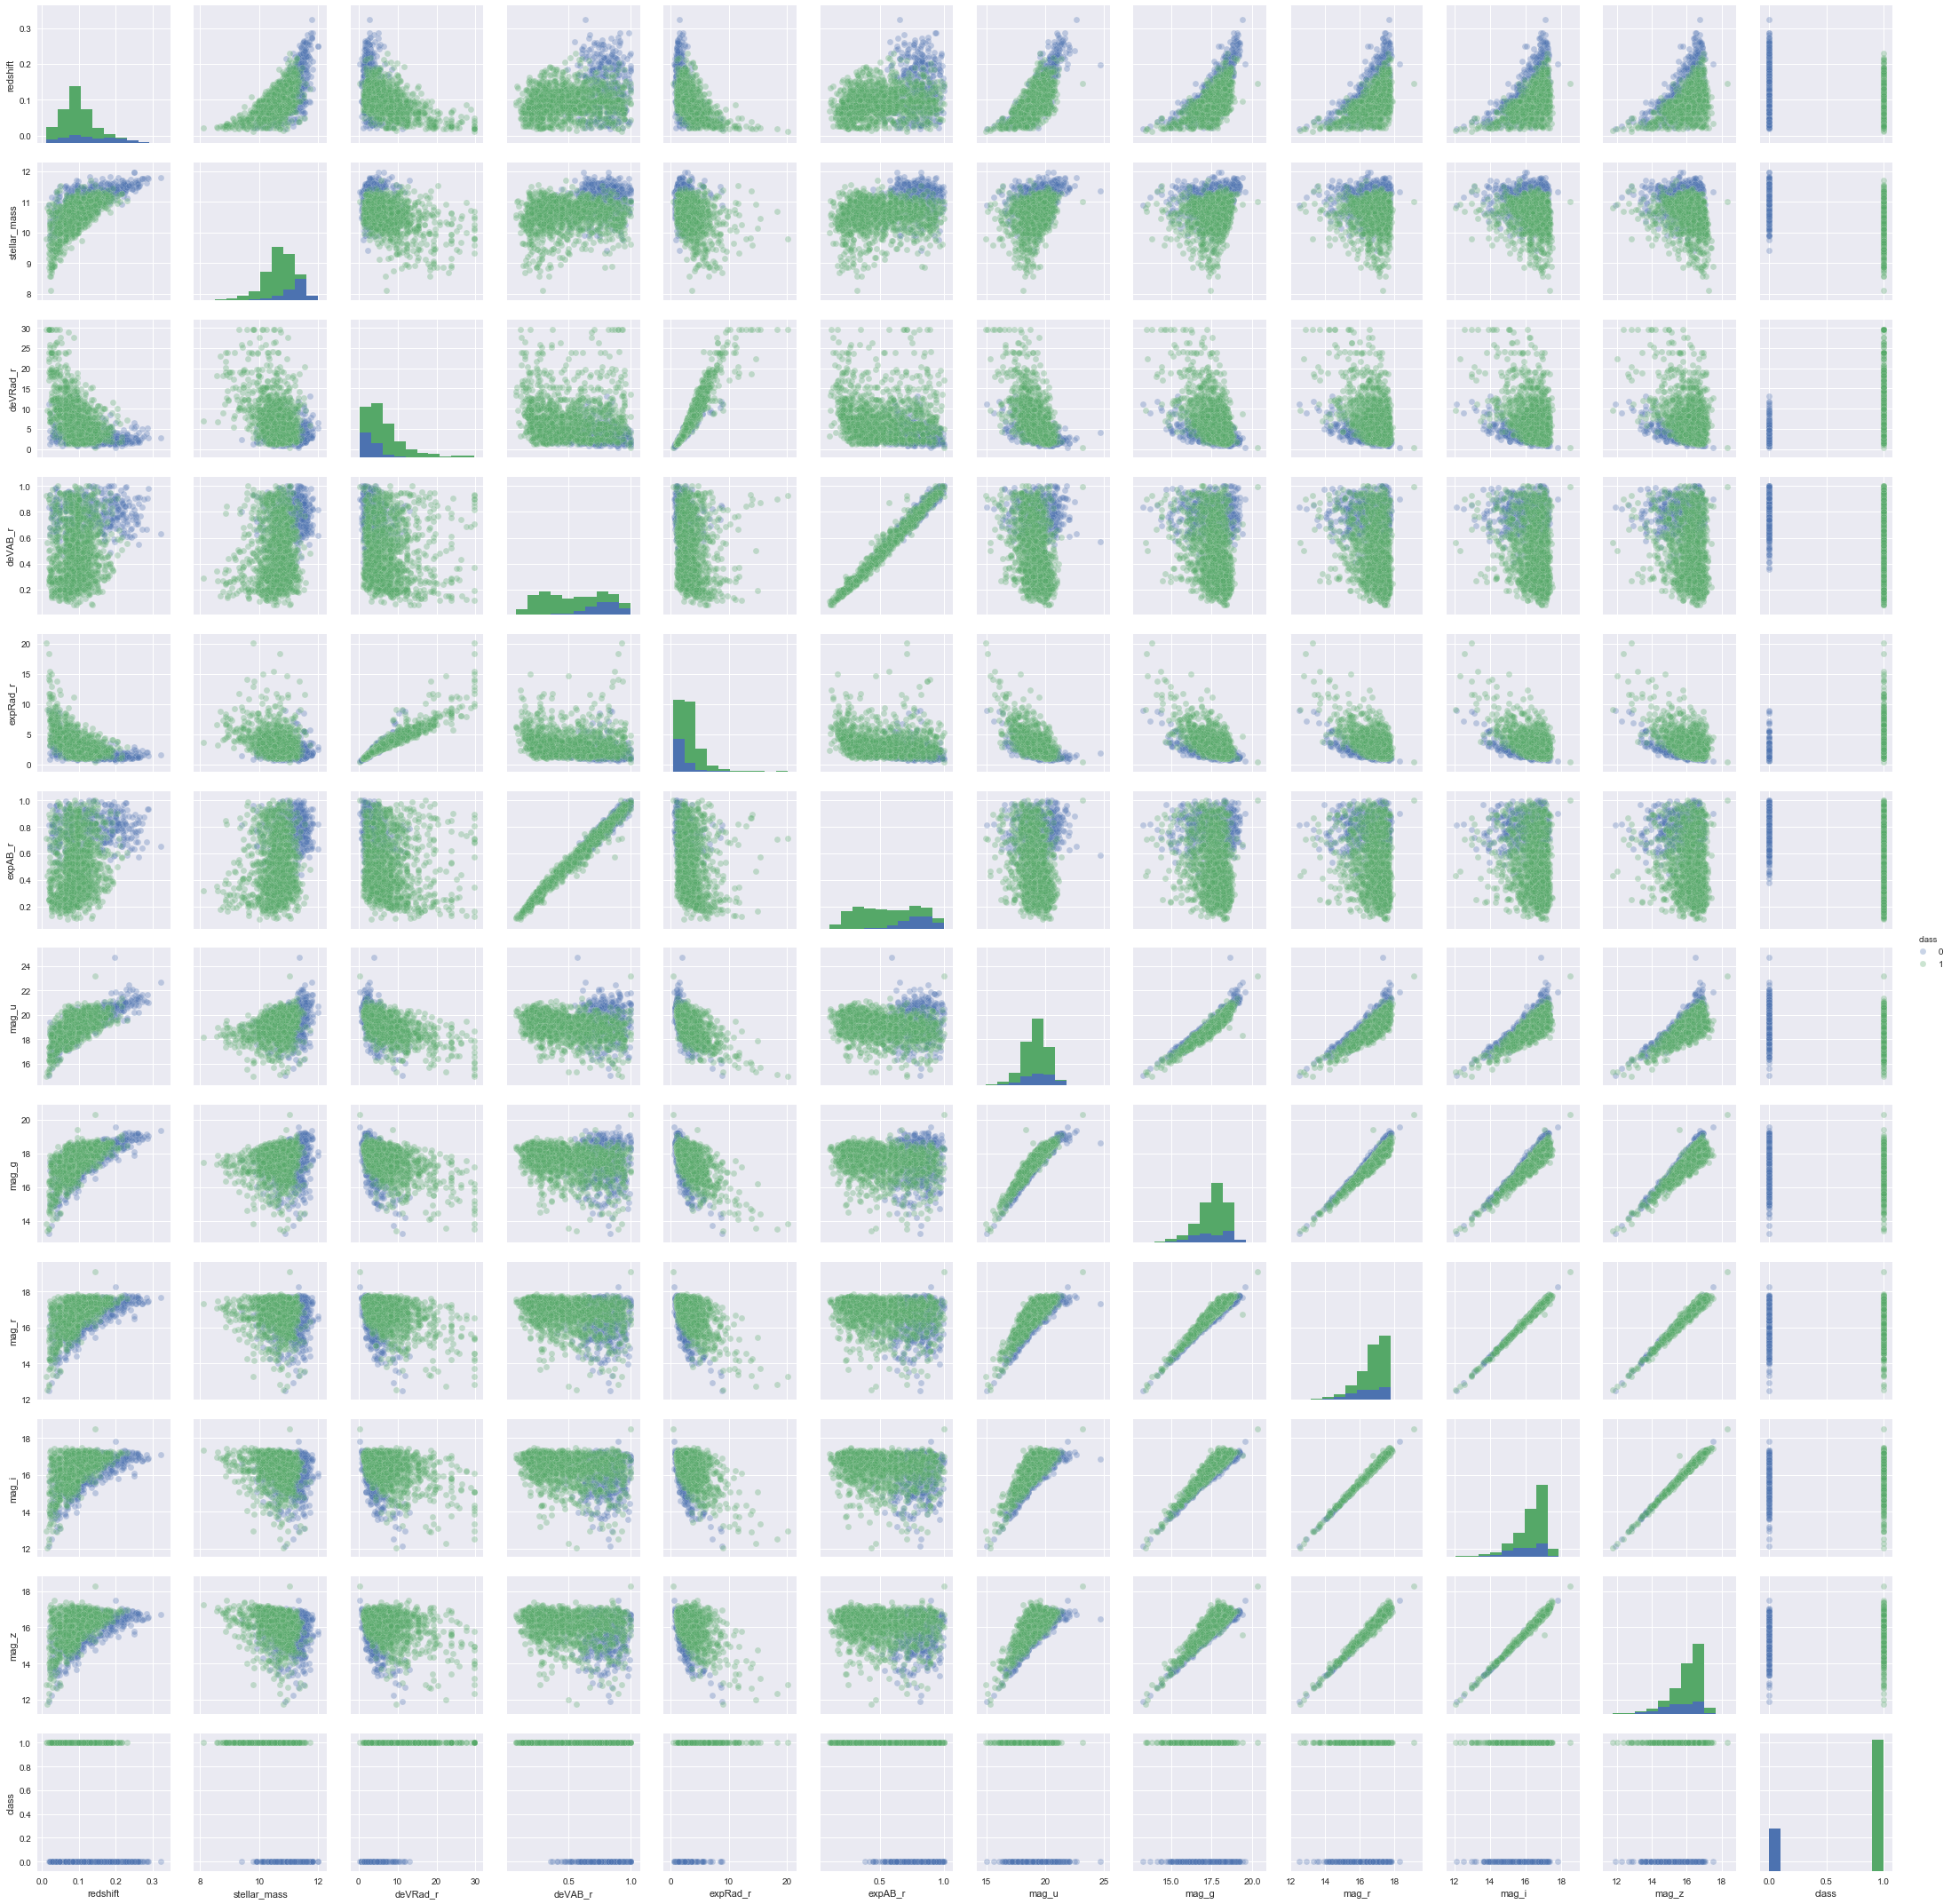

In [22]:
# Command to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

magnitudes = ['mag_u', 'mag_g', 'mag_r', 'mag_i', 'mag_z']
measurements = ['redshift', 'stellar_mass', 'deVRad_r', 'deVAB_r', 'expRad_r', 'expAB_r']


# Plot scatterplot matrix with all features
selected_columns = measurements + magnitudes + ['class']
sb.pairplot(df[selected_columns], hue='class', plot_kws={'alpha': 0.3})

We can make a number of observations from this plot:

1. `reshift`, `stellar_mass`, `mag_u` and `mag_g` follow a normal distribution. This is something to keep in mind if we use modelling methods that assume the data is normally distributed.

2. There is a strong positive correlation between the `expAB_r` and `deVAB_r` which indicates we might not need to use both of these features in our model.

3. There is a strong positive correlation between the `mag_r`, `mag_i` and `mag_z`.

4. There is a positive correlation between `mag_u` and `mag_g` with the other magnitude bands but not as strong as in observation #3. This suggests these features might provide added information not present in the `mag_r`, `mag_i` and `mag_z` bands.

5. There are no clear pair-wise combinations of features that can easily seperate the two classes. 

Distnguishing between `spiral` and `elliptical` galaxies might be difficult given how much these features interrelate.

We can also make **violin plots** of the data to compare the measurement distributions of the classes. Violin plots contain the same information as [box plots](https://en.wikipedia.org/wiki/Box_plot), but also scales the box according to the density of the data.

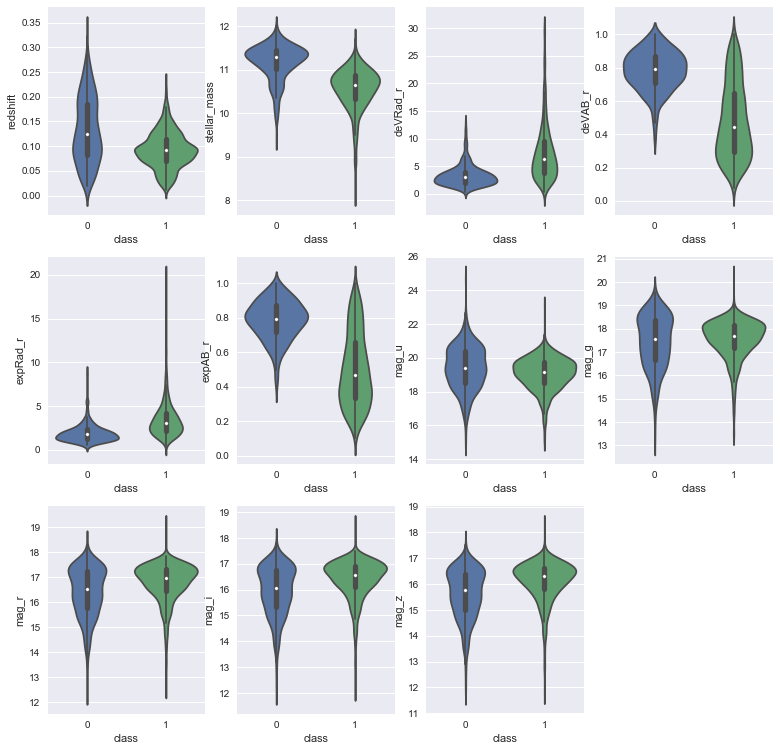

In [23]:
# General violin plots of all features
selected_columns = measurements + magnitudes + ['class']
plt.figure(figsize=(13, 13))
for column_index, column in enumerate(selected_columns):
    if column == 'class':
        continue
    plt.subplot(3, 4, column_index + 1)
    sb.violinplot(x='class', y=column, data=df[selected_columns])

There are numerous errors and possible scenarios you may face while exploring and cleaning your data.

The general takeaways here should be:

- Handle missing data: replace it if you can or drop it
- Ensure your data is encoded properly
- Check if your data falls within the expected range and use domain knowledge whenever possible to define that expected range
- Avoid tidying your data manually because that is not easily reproducible
- Use code as a record of how you tidied your data
- Plot everything you can about the data at this stage of the analysis so you can visually confirm everything looks correct

## 5. Data preparation

[[ go back to the top ]](#Table-of-contents)

Cleaning and exploring the data is a important component to any machine learning project. If we had jumped straight in to modelling, we would have trained a model with errors in the dataset. Bad data leads to bad models.

Now it's a good time to introduce some machine learning terminology.

### Terminology

- Each row is an `example` (also known as (aka): observation, sample, instance, record)
- Each column is a `feature` (aka: predictor, attribute, dimension, independent variable)
- The value we are predicting is the `label` (aka: target, outcome, dependent variable) 

In classification, the label is also referred to as the class or category.

### Notation

Let:
- `m` = the number of examples in our dataset
- `n` = the number of features in our dataset

The dataset can be represented by two variables as shown in Table 2:

1. A matrix `X` containing the examples and features of size `m x n`
2. A vector `y` containing the labels of size `m`

<p style="text-align:center;font-weight:bold">Table 2: Dataset notations</p>

<table>
    <thead>
        <tr>
            <th style="text-align:center" colspan=3>X</th>
            <th style="text-align:center">y</th>
        </tr>
        <tr>
            <th style="text-align:center">feature 1 ($x_1$)</th>
            <th style="text-align:center">feature 2 ($x_2$)</th>
            <th style="text-align:center">feature 3 ($x_3$)</th>
            <th style="text-align:center">label</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align:center">5</td>
            <td style="text-align:center">12</td>
            <td style="text-align:center">3</td>
            <td style="text-align:center">0</td>
        </tr>
        <tr>
            <td style="text-align:center">1</td>
            <td style="text-align:center">3</td>
            <td style="text-align:center">8</td>
            <td style="text-align:center">1</td>
        </tr>
        <tr>
            <td style="text-align:center">9</td>
            <td style="text-align:center">3</td>
            <td style="text-align:center">2</td>
            <td style="text-align:center">1</td>
        </tr>
        <tr>
            <td style="text-align:center">5</td>
            <td style="text-align:center">8</td>
            <td style="text-align:center">7</td>
            <td style="text-align:center">0</td>
        </tr>
        <tr>
            <td style="text-align:center">2</td>
            <td style="text-align:center">7</td>
            <td style="text-align:center">8</td>
            <td style="text-align:center">0</td>
        </tr>
    </tbody>
</table>

This is the standard notation used in machine learning. Following this convention makes it easier for other machine learning practitioners to understand your scripts. This notation also allows us to concisely define supervised machine learning and classification described in the [Introduction](#1.-Introduction) section.

#### Supervised learning
Learn a function `f` that maps features to labels
<p style="text-align:center;font-weight:bold">$f(X) \rightarrow y$</p>

\begin{align}
y &= \begin{bmatrix}
    y_1 \\
    \vdots \\
    y_i \\
    \vdots \\
    y_{m}
    \end{bmatrix}
\end{align}

With classification, $y_i = \{c_1, ..., c_k\},where\ k = number\ of\ classes$

We only have two classes in our dataset so $y_i \in \{0=elliptical, 1=spiral\}$

### Scikit Learn
We will be using the [scikit-learn](http://scikit-learn.org/) machine learning library for developing our models. As such, we need to prepare our dataset into a format that scikit-learn expects:

1. Features and labels are **separate objects**
2. Features and labels should be **numeric**
3. Features and labels should be **`numpy` arrays**
4. Features and labels should have **specific shapes**

**Note**: `pandas` is built on top of `numpy` so we can create the features matrix as a pandas `DataFrame` and labels vector as a pandas `Series`.

Let's prepare the dataset for scikit-learn.

In [24]:
import numpy as np
import pandas as pd

# Set a random seed number to repoduce our results
seed = 19

# Load the clean dataset
df = pd.read_csv('data/galaxies-clean.csv')

# Selected columns for modelling
measurements = ['redshift', 'stellar_mass', 'deVRad_r', 'deVAB_r', 'expRad_r', 'expAB_r']
magnitudes = ['mag_u', 'mag_g', 'mag_r', 'mag_i', 'mag_z']
features = measurements + magnitudes

# features matrix
X = df[features]
# labels vector
y = df['class']

Let's verify our features matrix and labels vector

In [25]:
# Features matrix
# expected output: pandas DataFrame, (number of rows, number of features)
print('X: %s, %s' % (type(X), X.shape))

# Labels vector 
# expected output: pandas Series, (number of rows,)
print('y: %s, %s' % (type(y), y.shape))

X: <class 'pandas.core.frame.DataFrame'>, (1797, 11)
y: <class 'pandas.core.series.Series'>, (1797,)


That looks great. Now we can start modelling.

## 6. Classification

[[ go back to the top ]](#Table-of-contents)

### Splitting the data

It's time to make the next big step in our analysis: splitting the data into training and test sets.

- A **training set** is a random subset of the data that we use to train our models.
- A **test set** is a random subset of the data (mutually exclusive from the training set) that we use to test our models.

In machine learning we are always concerned that our models will **overfit** the data. i.e. The model learns the training set so well that it won't be able to handle examples it's never seen before. This is why it's important for us to build the model with the training set, but score it with a separate unseen testing set.

Once we split the data into a training and test set, we should treat the test set like it no longer exists. We cannot use any information from the testing set to build our model or else we're cheating. The training dataset can also be split again to create a validation set to tune our models. It is important that the validation set is separate from the holdout test dataset.

This process is illustrated in the figure below.

<div style="text-align:center;font-weight:bold">Figure: Holdout set method to split the dataset</div>
<img src="images/holdout.png" />



Now let's split the dataset using the `train_test_split` function.

In [26]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=seed)

/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


With the dataset split, we can start fitting models to our data. We have heard from our colleagues that they have had success using decision tree classifiers in their projects so let's start with those.

Decision tree classifiers are incredibly simple in theory. In their simplest form, decision tree classifiers ask a series of Yes/No questions about the data — each time getting closer to finding out the class of each example — until they either classify the data set perfectly or simply can't differentiate a set of examples.

An example decision tree classifier for approving loan applications is shown in the following figure.

<div style="text-align:center;font-weight:bold">Figure: Decision tree example</div>
<img src="images/decision_tree_example.png" />

Notice how the classifier asks yes/no questions about the data. e.g. whether the applicant owns a house so it can differentiate the records. 

Decision tree classifiers are *scale-invariant*, i.e. the scale of the features does not affect their performance unlike many machine learning models. In other words, it doesn't matter if our features range from 0 to 1 or 0 to 1,000; decision tree classifiers will work with them just the same.

There are several [parameters](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) that we can tune for decision tree classifiers and different [metrics](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers) we can use to evaluate its performance. For now let's use a basic decision tree and the accuracy performance metric.

\begin{align}
accuracy &= \dfrac{correct\ classifications}{total\ number\ of\ classifications}
\end{align}

Scikit learn provides a 4 step modelling pattern which makes it easy to switch in different models / algorithms for your dataset. This pattern is described in the code and comments below. 

In [27]:
# Step 1: Import the model
from sklearn.tree import DecisionTreeClassifier

# Step 2: Instantiate the model
decision_tree_classifier = DecisionTreeClassifier(random_state=seed)

# Step 3: Fit the model on data (i.e. train the model)
decision_tree_classifier.fit(X_train, y_train)

# Step 4: Generate predictions / scores
decision_tree_classifier.score(X_test, y_test)

0.91388888888888886

That's great! Our model achieves 91% accuracy without much effort. We have already beaten the challenge to build a model with ≥ 70% accuracy.

However, there's a catch. Depending on how our training and testing set is sampled, our model can achieve anywhere from 87% to 96% accuracy.

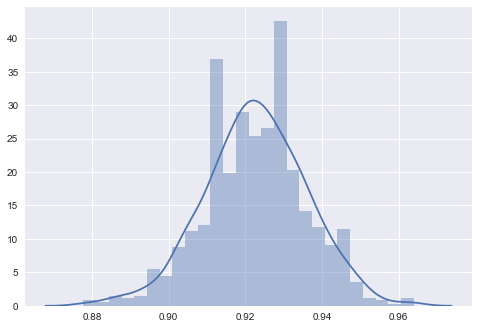

In [28]:
model_accuracies = []

# Split the dataset differently and fit a model on this split, 1,000 times
for i in range(1000):
    X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, train_size=0.8, random_state=i)
    
    decision_tree_classifier = DecisionTreeClassifier(random_state=seed)
    decision_tree_classifier.fit(X2_train, y2_train)
    classifier_accuracy = decision_tree_classifier.score(X2_test, y2_test)
    model_accuracies.append(classifier_accuracy)

sb.distplot(model_accuracies)

This is a problem! The model performance varies a lot depending on the subset of the data it's trained on. This means the model is **overfitting**: the model learns to classify the training set so well that it doesn't generalize and perform well on data it hasn't seen before (i.e. the test set).

### Cross-validation

[[ go back to the top ]](#Table-of-contents)

Cross validation is a method of splitting the dataset to help address this problem. For this lesson, we will use the ***k*-fold cross-validation** method. This involves splitting the original data set into *k* subsets, use one of the subsets as the testing set and, the rest of the subsets are used as the training set. This process is repeated *k* times such that each subset is used as the testing set exactly once. This process is illustrated in Figure X.

<div style="text-align:center;font-weight:bold">Figure: k-fold cross-validation</div>
<img src="images/k-fold.png" />

10-fold cross-validation is the most common choice so let's use that here. Performing 10-fold cross-validation on our data set looks something like this on a subset of 100 examples in our dataset.

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


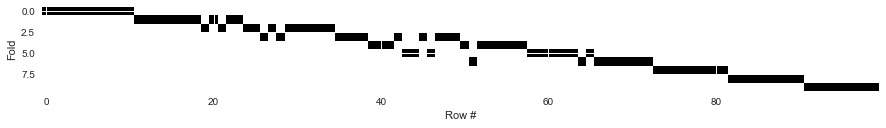

In [29]:
def plot_cv(cv, n_samples):
    masks = []
    for train, test in cv:
        mask = np.zeros(n_samples, dtype=bool)
        mask[test] = 1
        masks.append(mask)
        
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

from sklearn.cross_validation import StratifiedKFold
    
# Use a subset of 100 examples
subset = y[0:100]

# Plot the data split
plot_cv(StratifiedKFold(subset, n_folds=10), len(subset))

Each square in the plot represents an example in our dataset.

You'll notice that we used the `StratifiedKFold` function in the code above. Stratified means we keep the class percentage the same across all of the folds (~75% spiral), which is important for maintaining a representative subset of our dataset. i.e. we don't want to end up having 100% spiral galaxies in one of the folds.

We can fit a decision tree classifier using 10-fold cross-validation with the `cross_val_score` function.

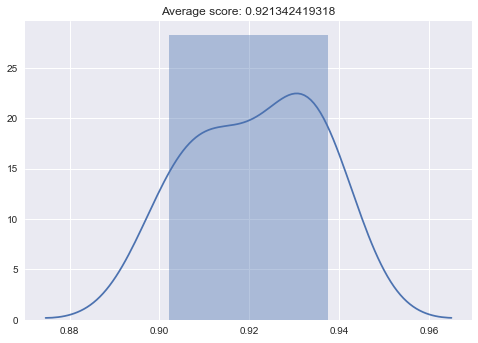

In [30]:
# Import the cross_val_score function
from sklearn.model_selection import cross_val_score

# Create a decision tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=seed)

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, X_train, y_train, cv=10)

# Plot the results
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

That looks much better. We have a more consistent score (less variance) of our model's classification accuracy.

### Learning curves

[[ go back to the top ]](#Table-of-contents)

Learning curves allow us to evaluate the performance of our models as they are provided more training examples. i.e. They show us how or if our model learns. Plotting these curves also allows us to diagnose our models in order to gain insights on how we can improve them. More specifically, learning curves allows us to identify:

- underfitting (high bias): model performs poorly on training and validation
- overfitting (high variance): model performance is good on training but much poorer on validation

Ideally, we want to develop a model that achieves similar performance on both the training and validation sets (good bias and variance trade off) as shown in the figure below.

<div style="text-align:center;font-weight:bold">Figure: Learning curves</div>
<img src="images/learning_curves.png" />

Let's plot the learning curve for our decision tree classifier using the `learning_curve` function.

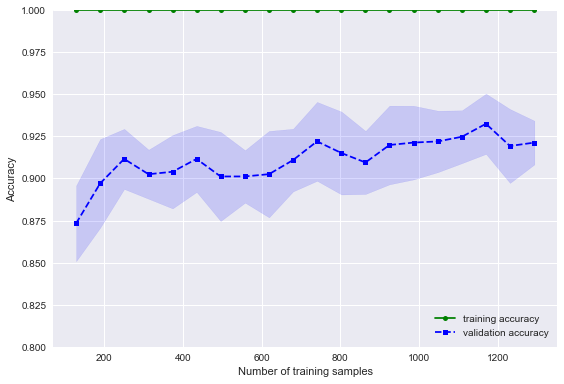

In [31]:
# Import the learning_curve function
from sklearn.model_selection import learning_curve

# Create a decision tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=seed)

# Generate the learning curve scores
train_sizes, train_scores, val_scores = learning_curve(estimator=decision_tree_classifier,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 20),
                                                       cv=10,
                                                       n_jobs=1)

# Calculate the result averages and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the training learning curve
plt.plot(train_sizes, train_mean,
         color='green', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='green')

# Plot the validation learning curve
plt.plot(train_sizes, val_mean,
         color='blue', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 val_mean + val_std,
                 val_mean - val_std,
                 alpha=0.15, color='blue')

# Plot settings
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1])
plt.tight_layout()
# plt.savefig('images/learning_curve.png', dpi=300)
plt.show()

From the learning curve we can see that the decision tree classifier overfits the training dataset. The training accuracy remains constant at 100% (fits the data perfectly) while the average validation scores steadily increase from 87% to 93% as the number of training samples increases.

Now that we know our decision tree classifier overfits the dataset, let's do something about it!

### Parameter tuning

[[ go back to the top ]](#Table-of-contents)

Every machine learning model comes with a variety of parameters to tune, and these parameters can be vitally important to the performance of our classifier. For example, using the default parameters for decision trees has resulted in our classifier overfitting the training dataset. 

As an extreme example, let's limit the depth of our decision tree classifier to a `max_depth = 1`:

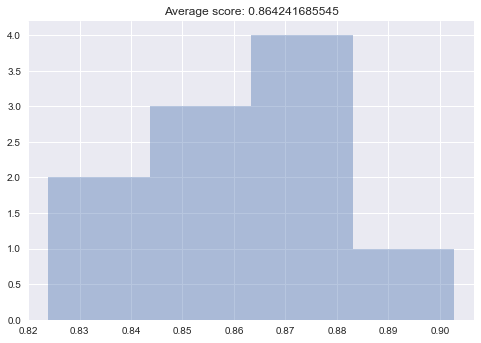

In [32]:
# Set the max_depth of the decision tree to 1
decision_tree_classifier = DecisionTreeClassifier(max_depth=1, random_state=seed)

# Calculate the cross validation score
cv_scores = cross_val_score(decision_tree_classifier, X_train, y_train, cv=10)

# Plot the results
sb.distplot(cv_scores, kde=False)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
plt.show()

The average classification accuracy has dropped to 86%.

We need to use a systematic method to discover the best parameters for our model and dataset.

#### Grid search

A common method for model parameter (hyperparameter) tuning is grid search. The idea behind grid search is to explore a range of parameters and find the best-performing parameter combination. Focus your search on the best range of parameters, then repeat this process several times until the best parameters are discovered.

Let's tune our decision tree classifier using the `GridSearchCV` function. We'll stick to only two parameters for now (`max_depth` and `max_features`), but it's possible to simultaneously explore dozens of parameters if we want.

In [33]:
# Import the GridSearchCV function
from sklearn.model_selection import GridSearchCV

# Create a decision tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=seed)

# Hyperparameter values to explore
parameter_grid = {'max_depth': [1, 2, 3, 4, 5, 6],
                  'max_features': [7, 8, 9, 10, 11]}

# Create a cross validation object using StratifiedKFold
cross_validation = StratifiedKFold(y_train, n_folds=10, random_state=seed)

# Instantiate the grid search using GridSearchCV
grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

# Fit the decision tree using grid search
grid_search.fit(X_train, y_train)

# Display the results
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.92832289492
Best parameters: {'max_features': 9, 'max_depth': 6}


We can also visualize the grid search to see how the parameters interact.

/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


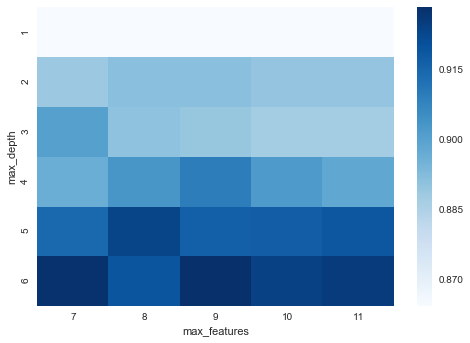

In [34]:
grid_visualization = []

for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)

grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (6, 5)
sb.heatmap(grid_visualization, cmap='Blues')
plt.xticks(np.arange(5) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(6) + 0.5, grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')

Now we have a better sense of the parameter space: a `max_depth > 4` is needed for the decision tree perform reasonably well. Tuning the `max_features` doesn't seem to make as much difference as we achieved the best performance with using `9` out of the 11 features.

An alternative way to visualise the performance of your parameter tuning results is to plot [validation curves](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html).

Let's go ahead and use a broader grid search to find the best settings for more parameters.

In [35]:
# SOLUTIONS NOTEBOOK ONLY

# Create a decision tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=seed)

# Hyperparameter values to explore
parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [4, 5, 6],
                  'max_features': [7, 8, 9, 10, 11],
                  'min_samples_split': [2, 4, 6, 8]}

# Create a cross validation object using StratifiedKFold
cross_validation = StratifiedKFold(y_train, n_folds=10, random_state=seed)

# Instantiate the grid search using GridSearchCV
grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

# Fit the decision tree using grid search
grid_search.fit(X_train, y_train)

# Display the best model scores and parameters
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.931106471816
Best parameters: {'max_features': 9, 'min_samples_split': 2, 'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}


Save the best classifier from the grid search.

In [36]:
decision_tree_classifier = grid_search.best_estimator_
# Examine the model
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=19, splitter='best')

Now plot the learning curve for the best classifier for evaluation.

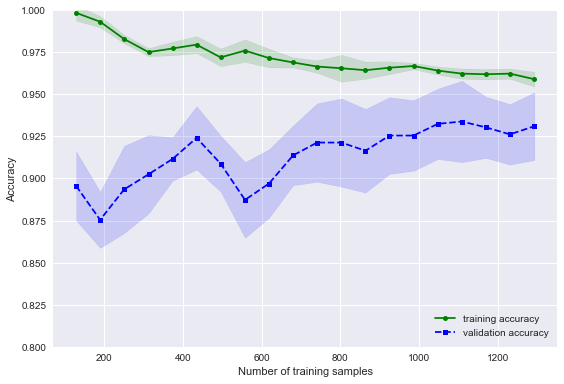

In [37]:
# SOLUTIONS NOTEBOOK ONLY

# Generate the learning curve scores
train_sizes, train_scores, val_scores = learning_curve(estimator=decision_tree_classifier,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 20),
                                                       cv=10,
                                                       n_jobs=1)

# Calculate the result averages and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the training learning curve
plt.plot(train_sizes, train_mean,
         color='green', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='green')

# Plot the validation learning curve
plt.plot(train_sizes, val_mean,
         color='blue', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 val_mean + val_std,
                 val_mean - val_std,
                 alpha=0.15, color='blue')

# Plot settings
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1])
plt.tight_layout()
# plt.savefig('images/learning_curve.png', dpi=300)
plt.show()

This learning curve looks better. The gap between the training and validation accuracy has reduced with training score of 95% and a validation score of 93% which suggests the model is no longer overfitting.

### Reporting
[[ go back to the top ]](#Table-of-contents)

Score the classifier on the test dataset.

In [38]:
# SOLUTIONS NOTEBOOK ONLY
# Get the best estimator from the grid search
decision_tree_classifier = grid_search.best_estimator_

# Score the estimator on the test dataset
decision_tree_classifier.score(X_test, y_test)

0.92777777777777781

Our best classifier achieves a test accuracy score of 92.7% which is almost on par with our validation score of 93%. This gives us confidence that our experiment design and trained model is providing realistic results.

We can generate a confusion matrix using the `confusion_matrix` function to get more detailed classification results.

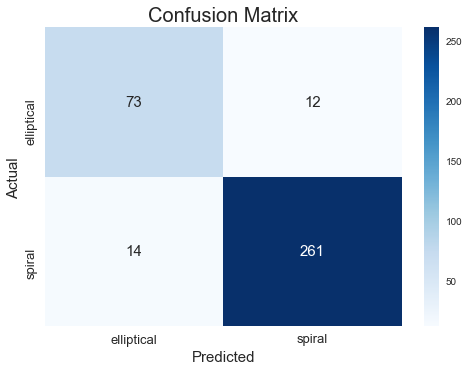

In [39]:
# Import the confusion_matrix function
from sklearn.metrics import confusion_matrix

# Generate the predictions
y_pred = decision_tree_classifier.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for plotting
labels = ['elliptical', 'spiral']
df_cm = pd.DataFrame(cm, columns=labels, index=labels)

# Plot the confusion matrix
sb.heatmap(df_cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 15})
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Actual', fontsize=15)
plt.yticks(fontsize=13)
plt.show()

The confusion matrix provides more detailed information of where the classifier made mistakes (i.e. where it was confused). Here we can see that the model predicted 12 galaxies as spiral that were actually elliptical and 14 elliptical galaxies that were actually spiral. Overall, it looks like the decision tree classifier has performed quite well on test dataset.

We can also visualize the decision tree with [GraphViz](http://www.graphviz.org/) to see how it's making the classifications:

In [40]:
import sklearn.tree as tree
from sklearn.externals.six import StringIO

with open('images/galaxy_tree.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

In [41]:
# The exported decision tree graph displays features by their index. e.g. X[0], ... X[10]
# This snippet will replace the index names with the actual feature names
replacements = {}
for index, feature in enumerate(features):
    key = 'X[%d]' % (index)
    replacements[key] = feature

with open('images/galaxy_tree.dot') as infile, open('images/galaxy_tree_names.dot', 'w') as outfile:
    for line in infile:
        for src, target in replacements.items():
            line = line.replace(src, target)
        outfile.write(line)

If you have [GraphViz](http://www.graphviz.org/) installed then you can generate a image of the decision tree with the following command:

    dot -Tpng images/galaxy_tree_names.dot -o images/galaxy_tree_names.png

<img src="images/galaxy_tree_names.png" />

Alright! We finally have our demo classifier. Let's create some more visuals of its performance so we have something to put in our report.

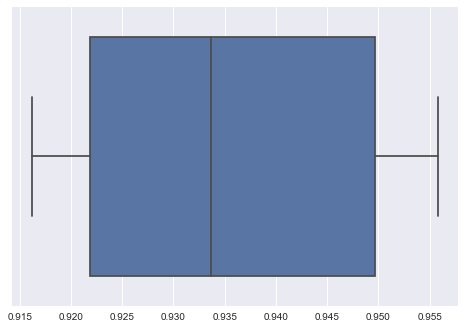

In [42]:
dt_scores = cross_val_score(decision_tree_classifier, X, y, cv=10)
sb.boxplot(dt_scores)

This plot is not very useful with just one model so let's train another.

A common problem with decision trees is that they're prone to overfitting. They can add complex rules to the point that they classify the training set near-perfectly (as we saw early with our learning curves), but fail to generalise well to data they have not seen before.

**Random Forest classifiers** work around this limitation by creating many decision trees (i.e. a forest), each trained on random subsets of training samples and features. These decision trees are then combined to make a more accurate classification. Let's see if a random forest classifier works better for our datatset. 

The great part about scikit-learn is that the modelling pattern of training, testing, parameter tuning, etc. process is the same for all models. We only need to plug in the new classifier.

In [43]:
# Step 1: Import the class
from sklearn.ensemble import RandomForestClassifier

# Step 2: Instantiate the estimator
random_forest_classifier = RandomForestClassifier(random_state=seed)

# Hyperparameter values to explore
parameter_grid = {'n_estimators': [5, 10, 25, 50],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4],
                  'warm_start': [True, False]}

# Create a cross validation object using StratifiedKFold
cross_validation = StratifiedKFold(y_train, n_folds=10, random_state=seed)

# Instantiate the grid search using GridSearchCV 
grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

# Step 3 & 4: Fit the estimator on data (i.e. train the model) and generate predictions
grid_search.fit(X_train, y_train)

# Display the best model scores and parameters
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.952679192763
Best parameters: {'max_features': 4, 'n_estimators': 25, 'criterion': 'entropy', 'warm_start': True}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=19, verbose=0, warm_start=True)

The random forest classifier achieved a 95% cross validation accuracy score. Find out how well it performs on the test dataset.

In [44]:
# SOLUTIONS NOTEBOOK ONLY
# Get the best estimator from the grid search
random_forest_classifier = grid_search.best_estimator_

# Score the estimator on the test dataset
random_forest_classifier.score(X_test, y_test)

0.96111111111111114

Random forests performs better than the decision tree classifier on the test dataset:

- decision trees ~ 92%
- random forests ~ 96%

We can also plot and compare their cross validation performance.

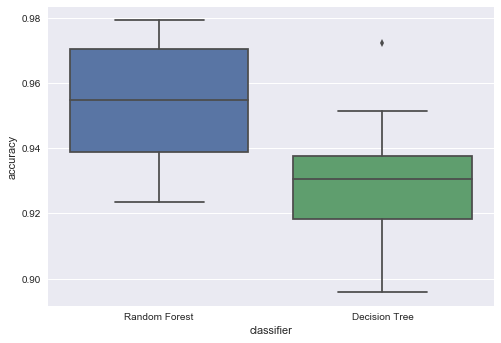

In [45]:
rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, X_train, y_train, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, X_train, y_train, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sb.boxplot(x='classifier', y='accuracy', data=both_df)

Random forests also performs better on average than decisions trees with cross validation. Random forest classifiers can perform particularly well when there's hundreds of possible features to model (we only have 11 features in dataset). In other words, there was not much room for improvement for random forests over decision trees with this dataset.

To report more detailed information of our model, let's see what features were considered the most important for both classifiers.

In [46]:
# Decision tree features
sorted(zip(decision_tree_classifier.feature_importances_, features), reverse=True)

[(0.46269416133009605, 'stellar_mass'),
 (0.15681121089636116, 'deVAB_r'),
 (0.14057622944480549, 'deVRad_r'),
 (0.12201512638139936, 'expAB_r'),
 (0.052484089510222494, 'redshift'),
 (0.030267625687534775, 'expRad_r'),
 (0.021412290724942117, 'mag_z'),
 (0.013739266024638607, 'mag_r'),
 (0.0, 'mag_u'),
 (0.0, 'mag_i'),
 (0.0, 'mag_g')]

In [47]:
# Random forests features
sorted(zip(random_forest_classifier.feature_importances_, features), reverse=True)

[(0.22982986327267074, 'stellar_mass'),
 (0.15988872036772553, 'deVAB_r'),
 (0.14061628935889348, 'expAB_r'),
 (0.12154504477490677, 'deVRad_r'),
 (0.082072912406148946, 'expRad_r'),
 (0.080674931251261503, 'redshift'),
 (0.058090133423356761, 'mag_z'),
 (0.04409737425845086, 'mag_i'),
 (0.031740415114354013, 'mag_u'),
 (0.027922713225196572, 'mag_g'),
 (0.023521602547034885, 'mag_r')]

Both classifiers rank the importance of the features in a similar order with the exception of the magnitudes. The stellar mass, ellipticity, radius and redshift of the galaxies were the most important features. 

If you want to explore this further you could experiment with removing the `mag_u`, `mag_i`, `mag_g` features as they scored a feature importance of `0` for the decision tree classifier to see how it affects classification performance. Additionally, you can experiment with various [feature selection methods](http://scikit-learn.org/stable/modules/feature_selection.html) for systemtically selecting a reduced feature set.

#### Other algorithms

There are many [classification algorithms](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) we can experiment with on our dataset. Try fitting a [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and [Multi Layer Perceptron (MLP - Neural Network)](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) model on the dataset. It is up to you whether you want to perform parameter tuning on these models. 

Generate boxplots so we can compare the performance with the decision tree and random forest models.

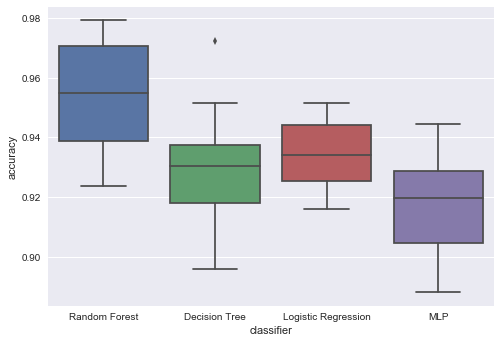

In [48]:
# SOLUTIONS NOTEBOOK ONLY
# Import the required models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Initialise the models
logreg_classifier = LogisticRegression(random_state=seed)
mlp_classifier = MLPClassifier(random_state=seed)

# Calculate the cross validation scores
logreg_cv = cross_val_score(logreg_classifier, X_train, y_train, cv=10)
mlp_cv = cross_val_score(mlp_classifier, X_train, y_train, cv=10)

# Create a DataFrame of the results
logreg_df = pd.DataFrame({'accuracy': logreg_cv, 'classifier': ['Logistic Regression'] * 10})
mlp_df = pd.DataFrame({'accuracy': mlp_cv, 'classifier': ['MLP'] * 10})

# Merge all classifier results
classifiers_df = rf_df.append([dt_df, logreg_df, mlp_df])

# Generate a box plot comparing the different algorithms
sb.boxplot(x='classifier', y='accuracy', data=classifiers_df)

### Challenge

Pick your favourite model and use it to predict the morphology of galaxies that have been labelled as  uncertain in the dataset. 

- How many spiral vs. elliptical galaxies does the model predict?
- How do the model predictions compare with the debiased labelled probabilities?
- How could you use this model and results in practice?

## 7. Regression

[[ go back to the top ]](#Table-of-contents)

Your colleague has heard about your recent success in applying machine learning for galaxy classification. They mention they have a dataset containing _ugriz_ photomerty of galaxies but no redshift measurements. They would like you to develop a machine learning model to estimate the redshift values.

This is a regression problem. Regression is a supervised learning approach but instead of predicting the category of an example, we are predicting a continuous value. i.e. $y_i \in\ \mathbb{R}$. For example, the predicted redshift of galaxy `i` is 0.2312.

Developing a regression model follows the same process as building a classification model with the exception of using a different metric for evaluating the model performance. i.e. we can't use classification accuracy for evaluating our regression model.

###  Prepare the dataset

Load and prepare the dataset for using the scikit-learn library.

In [49]:
# SOLUTIONS NOTEBOOK ONLY
import numpy as np
import pandas as pd

# Set a random seed number to reproduce our results
seed = 11

# Clean dataset file
clean_dataset = 'data/galaxies-clean.csv'

# 1. Load the dataset using pandas read_csv function
df = pd.read_csv(clean_dataset)

# 2. Select the columns of interest for modelling
features = ['mag_u', 'mag_g', 'mag_r', 'mag_i', 'mag_z']

# 3. Create the features matrix as X
X = df[features]

# 4. Create the labels vector as y
y = df['redshift']

###  Split the dataset

Create a training and test dataset using the `train_test_split` function.

In [50]:
# SOLUTIONS NOTEBOOK ONLY
# Import the function
from sklearn.model_selection import train_test_split

# Split the dataset into X_train, X_test, y_train, y_test
# Use a training dataset size of 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=seed)

### Train models

We will fit the regression models without any parameter tuning using the following three models:

- [Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [RandomForestRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
- [MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

We will measure model performance using the root mean squared error (RMSE) metric. This can be calculated by using the NumPy function `np.sqrt` and the scikit-learn `mean_squared_error` function. 

In [51]:
# SOLUTIONS NOTEBOOK ONLY

# Step 1: Import the classes
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Step 2: Instantiate the estimators
lr = LinearRegression()
rf = RandomForestRegressor(random_state=seed)
mlp = MLPRegressor(random_state=seed)

# Step 3: Fit the estimators on data (i.e. train the models)
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
mlp.fit(X_train, y_train)

# Step 4: Generate predictions
y_pred_m1 = lr.predict(X_test)
y_pred_m2 = rf.predict(X_test)
y_pred_m3 = mlp.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE)
# np.sqrt(mean_squared_error(...))
m1_score = np.sqrt(mean_squared_error(y_test, y_pred_m1))
m2_score = np.sqrt(mean_squared_error(y_test, y_pred_m2))
m3_score = np.sqrt(mean_squared_error(y_test, y_pred_m3))

# Display the model scores
print('Linear regression: %.3f' % (m1_score))
print('Random forest regressor: %.3f' % (m2_score))
print('Multi layer perceptron: %.3f' % (m3_score))

Linear regression: 0.022
Random forest regressor: 0.026
Multi layer perceptron: 0.079


/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


The linear regression model is off by an average of 0.022 redshift while the random forest regression has an RMSE of 0.026. The multi layer perceptron (without any parameter tuning) achieves a poorer RMSE of 0.079.

Let's examine the correlation between the predicted and actual redshift values for both models.

In [52]:
# calculate the correlation between the labels and predictions
m1_corr = np.corrcoef(y_test, y_pred_m1)[0][1]
m2_corr = np.corrcoef(y_test, y_pred_m2)[0][1]
m3_corr = np.corrcoef(y_test, y_pred_m3)[0][1]

print('Linear regression: %.3f' % (m1_corr))
print('Random forest regressor: %.3f' % (m2_corr))
print('Multi layer perceptron: %.3f' % (m3_corr))

Linear regression: 0.888
Random forest regressor: 0.838
Multi layer perceptron: -0.183


That's impressive. The linear regression model has a correlation value of 0.889 while random forests achieves 0.834. However, the multi layer perceptron performs poorly with a correlation of -0.183.

Let's look at the generated coefficients and intercept values for the linear regression model.

In [53]:
print(lr.intercept_)
print(lr.coef_)

-0.294165415665
[-0.02794643  0.25568438 -0.13844462 -0.37345313  0.3028921 ]


In [54]:
# pair coefficients with feature names
list(zip(features, lr.coef_))

[('mag_u', -0.027946434186042604),
 ('mag_g', 0.25568438404504695),
 ('mag_r', -0.13844461806634425),
 ('mag_i', -0.37345313161319443),
 ('mag_z', 0.30289210265068806)]

This shows that the linear regression model for estimating the redshift of a galaxy is:

<p style="text-align:center;font-weight:bold">$redshift = -0.027(mag_u) + 0.255(mag_g) - 0.138 (mag_r) - 0.373(mag_i) + 0.302(mag_z) - 0.294$</p>

### Feature normalisation

An important data preparation step for many machine learning models is to [normalise / standarised the feature values](http://scikit-learn.org/stable/modules/preprocessing.html) in our dataset. e.g. we can scale the magnitude values to a smaller and standardised range of [0, 1]. Note: this is not required for decision trees and random forests as those models are scale invariant.

We can normalise our features to a range of [0, 1] using the scikit-learn `MinMaxScaler()` function.

In [55]:
# Import the MinMaxScaler function
from sklearn.preprocessing import MinMaxScaler 

# Fit the scaler on the training dataset ONLY
scaler = MinMaxScaler().fit(X_train)

# Transform both the training and test datasets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print out the new scaled values
print('Original scale:')
print('  X_train %.3f - %.3f' % (np.min(np.min(X_train)), np.max(np.max(X_train))))
print('  X_test %.3f - %.3f' % (np.min(np.min(X_test)), np.max(np.max(X_test))))
print('Transformed scale:')
print('  X_train %.3f - %.3f' % (np.min(X_train_scaled), np.max(X_train_scaled)))
print('  X_test %.3f - %.3f' % (np.min(X_test_scaled), np.max(X_test_scaled)))

Original scale:
  X_train 11.729 - 24.691
  X_test 12.357 - 21.861
Transformed scale:
  X_train 0.000 - 1.000
  X_test 0.014 - 0.895


Now fit a linear regression and multi layer perceptron model on the scaled dataset.

In [56]:
# SOLUTIONS NOTEBOOK ONLY

# Instantiate the estimators
lr_scaled = LinearRegression()
mlp_scaled = MLPRegressor(random_state=seed)

# Fit the estimators
lr_scaled.fit(X_train_scaled, y_train)
mlp_scaled.fit(X_train_scaled, y_train)

# Generate predictions
y_pred_m1 = lr_scaled.predict(X_test_scaled)
y_pred_m2 = mlp_scaled.predict(X_test_scaled)

# Calculate the Root Mean Squared Error (RMSE)
# np.sqrt(mean_squared_error(...))
m1_score = np.sqrt(mean_squared_error(y_test, y_pred_m1))
m2_score = np.sqrt(mean_squared_error(y_test, y_pred_m2))

# calculate the correlation coefficient
m1_corr = np.corrcoef(y_test, y_pred_m1)[0][1]
m2_corr = np.corrcoef(y_test, y_pred_m2)[0][1]

# print the results
print('Linear regresssion scaled')
print('  RMSE: %.3f' % (m1_score))
print('  correlation: %.3f' % (m1_corr))
print('Multi layer perceptron scaled')
print('  RMSE: %.3f' % (m2_score))
print('  correlation: %.3f' % (m2_corr))

Linear regresssion scaled
  RMSE: 0.022
  correlation: 0.888
Multi layer perceptron scaled
  RMSE: 0.040
  correlation: 0.554


The linear regression model achieved the same performance on the scaled and unscaled dataset (0.022 RMSE). However, the multi layer perceptron model has an improved RMSE of 0.040 (previously 0.079) and correlation coefficient of 0.554 (previously -0.183) on the scaled dataset.

Normalisation might not always improve performance but it is common practice to do so before training certain types of models. You should also think about your dataset and what features you are normalising. e.g. are the features measured on a linear scale? Should magnitude be normalised or should the raw fluxes be normalised instead?

### Feature engineering

Another approach to improve the performance of our models is to try new features based on our knowledge of the domain. This is known as feature engineering.

We are currently using the raw magnitude bands as features to estimate a galaxy's redshift. However, it might make more sense to use colour features that measure the ratio of flux in neighbouring filters. This is equivalent to subtracting the magnitudes of the neighbouring filters. The key to photometric red shift is that a red shifted galaxy will have different observed colors to what it would have at red shift zero. i.e. galaxies at higher redshift tend to be redder in colour. 

With this knowledge, let's build a model with 4 engineered features by subtracting neighbouring bands in the `ugriz` magnitude channels:

- $mag_u - mag_g$
- $mag_g - mag_r$
- $mag_r - mag_i$
- $mag_i - mag_z$

In [57]:
# Make a copy of the features matrix
X_new = X.copy()

# Create new features
# subtract neighbouring magnitudes
X_new['u-g'] = X_new['mag_u'] - X_new['mag_g']
X_new['g-r'] = X_new['mag_g'] - X_new['mag_r']
X_new['r-i'] = X_new['mag_r'] - X_new['mag_i']
X_new['i-z'] = X_new['mag_i'] - X_new['mag_z']

# Remove the old columns
X_new.drop(['mag_u', 'mag_g', 'mag_r', 'mag_i', 'mag_z'], axis=1, inplace=True)

Fit a linear regression and a multi layer perceptron model with the new features.

In [58]:
# SOLUTIONS NOTEBOOK ONLY

# Split the dataset into X_train, X_test, y_train, y_test
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, 
                                                                    y, 
                                                                    train_size=0.8, 
                                                                    random_state=seed)

# Instantiate the estimators
lr_new = LinearRegression()
mlp_new = MLPRegressor(random_state=seed)

# Fit the estimators
lr_new.fit(X_train_new, y_train_new)
mlp_new.fit(X_train_new, y_train_new)

# Generate predictions
m1_pred = lr_new.predict(X_test_new)
m2_pred = mlp_new.predict(X_test_new)

# Calculate the RMSE
m1_score = np.sqrt(mean_squared_error(y_test_new, m1_pred))
m2_score = np.sqrt(mean_squared_error(y_test_new, m2_pred))

# Calculate the correlation coefficient
m1_corr = np.corrcoef(y_test, m1_pred)[0][1]
m2_corr = np.corrcoef(y_test, m2_pred)[0][1]

# Print the result
print('Linear regresssion new features')
print('  RMSE: %.3f' % (m1_score))
print('  correlation: %.3f' % (m1_corr))
print('Multi layer perception new features')
print('  RMSE: %.3f' % (m2_score))
print('  correlation: %.3f' % (m2_corr))

Linear regresssion new features
  RMSE: 0.025
  correlation: 0.846
Multi layer perception new features
  RMSE: 0.031
  correlation: 0.753


The linear regression model achieved a poorer RMSE of 0.025 (previously 0.022) and correlation coefficient of 0.846 (previously 0.888). However, the multi layer perception model achieved improved performance with a RMSE of 0.031 (previously on the scaled dataset 0.040) and a correlation coefficient of 0.753 (previously 0.554) with the new features.

It is up to you to decide on how long you want to spend coming up with and experiment with new features. The amount of time you spend on feature engineering is often based on your desired model performance and project requirements (e.g. deadlines).

### Challenge

Apply the steps used in the [Step 5: Classification](#Step-5:-Classification) section for cross-validation, generating learning curves, parameter tuning and reporting on your regression models.

Are there any ways you can improve the performance? Can you come up with better features or try other [regression algorithms](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) for this dataset?

## 8. Clustering

[[ go back to the top ]](#Table-of-contents)

Clustering is an unsupervised learning algorithm that groups similar objects together. How these objects are grouped is based upon what features are provided to the algorithm. Recall that unsupervised learning algorithms model the underlying structure of the data `X`. No corresponding labels `y` are available / provided.

### K-means

K-means is a simple and popular clustering algorithm. The `K` in its name refers to the number of clusters we want to generate from the dataset. For example, `K = 3` means we want to generate 3 clusters. 

The K-means algorithm:

1. randomly place `K` points into the feature space. These serve as the initial centroids.
2. Assign each example to the group with the closest centroid (Euclidian distance).
3. When all examples have been assigned, recalculate the positions of the `K` centroids as the mean of all examples in the cluster.
4. Repeat steps 2 and 3 until the centroids no longer change.

An example output of generating 3 clusters for a dataset is shown in figure below. The `x` markers show the location of the final centroids used to group examples.

![K-means](images/kmeans.png)
<div style="text-align:center;font-weight:bold">Figure: K-means clustering example</div>

**Note:** K-means does not work for categorical features. If you want to cluster categorical features then consider other methods such as [k-modes](https://pypi.python.org/pypi/kmodes/).

Let's try clustering galaxies based on the `u-r` and `g-i` colour features using the K-means algorithm.

First, let's load and prepare our dataset again for this section of the notebook.

In [59]:
# SOLUTIONS NOTEBOOK ONLY
import numpy as np
import pandas as pd

# Set a random seed number to repoduce our results
seed = 19

# Clean dataset file
clean_dataset = 'data/galaxies-clean.csv'

# Load the dataset
df = pd.read_csv(clean_dataset)

# Calculate the new features
df['u-r'] = df['mag_u'] - df['mag_r']
df['g-i'] = df['mag_g'] - df['mag_i']

# Select columns of interest
features = ['u-r', 'g-i']

# Create the features matrix
X = df[features]

# Create the labels vector
# We're not using labels in modelling but rather for plotting
y = df['class']

Split the dataset. Remember, we need to place the test dataset aside and treat it as it doesn't exist. We will be training a classification model based on insights gained from unsupervised learning later in the notebook.

In [60]:
# SOLUTIONS NOTEBOOK ONLY
# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=seed)

Apply the K-means algorithm on the dataset.

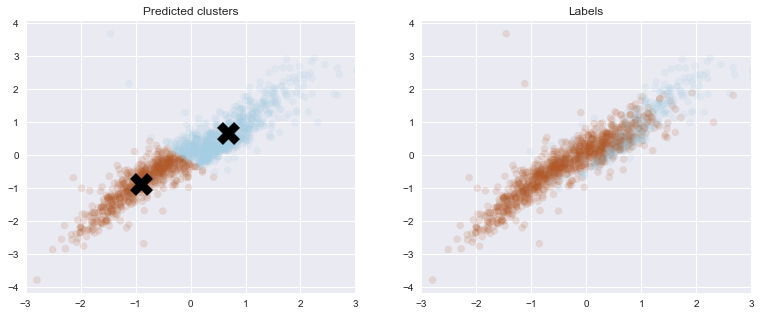

In [61]:
# Import the KMeans and StandardScaler libraries 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Specify the number of clusters
K = 2

# Instantiate the algorithm
kmeans = KMeans(n_clusters=K, random_state=seed)

# It is important to normalise the data for K-means to have zero mean
# To do this we will use the StandardScaler function
X_train_scaled = StandardScaler().fit_transform(X_train)

# Fit the algorithm
kmeans.fit(X_train_scaled) 

# predict the cluster / group for each example
y_pred = kmeans.predict(X_train_scaled)

# Generate plots
plt.figure(figsize=(13, 5))

# Predicted clusters
plt.subplot(1, 2, 1)
plt.xlim(-3, 3)
plt.title('Predicted clusters')
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], alpha=0.15, c=y_pred, cmap=plt.cm.Paired) 
# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='X', s=500, c='black')

# Real labels
plt.subplot(1, 2, 2)
plt.xlim(-3, 3)
plt.title('Labels')
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], alpha=0.15, c=y_train, cmap=plt.cm.Paired) 
plt.show()


The generated K-means clusters don't match up well with the galaxy labels. That's fine because we aren't explicitly training a model to group galaxies by their shape. We're asking the model to group galaxies based on the features provided (i.e. colour bands).

We can also experiment different values for K and see how the clusters change.

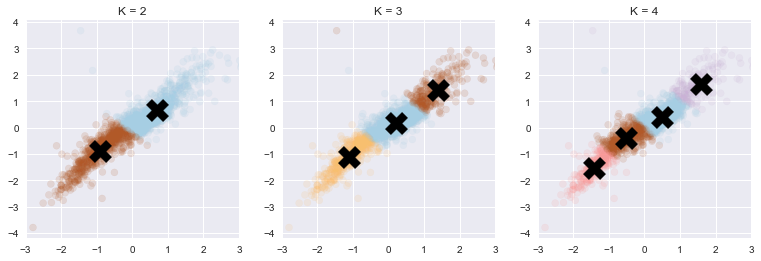

In [62]:
# Specify a list of cluster numbers
K_values = [2, 3, 4]

# Initialise plots
plt.figure(figsize=(13, 4))

for index, K in enumerate(K_values):
    kmeans = KMeans(n_clusters=K, random_state=seed)
    
    # Fit the algorithm
    kmeans.fit(X_train_scaled) 

    # predict the cluster / group for each example
    y_pred = kmeans.predict(X_train_scaled)

    # plot results
    plt.subplot(1, 3, index+1)
    plt.xlim(-3, 3)
    plt.title('K = %d' % (K))
    plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], alpha=0.15, c=y_pred, cmap=plt.cm.Paired) 
    # Plot the centroids
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='X', s=500, c='black')

plt.show()

So what `K` value is best suited for our dataset? Since we have 2 classes in our dataset, we naturally want to group the data into 2 clusters. However, if we are open to consider different numbers of clusters, then it might actually make more sense to use `K=3` to generate 3 clusters, where the additional / middle cluster represents the 'green valley' (a transformative phase) where galaxies are not quite elliptical or spiral but a bit of both.

If we had no labels, then we don't know how many clusters would best represent our dataset beforehand. Whether these clusters make sense or not will be based on trial and error. We would use our domain knowledge and inspect objects in these clusters to identify their similarities.  

However, a more systematic way to valiadate the number of clusters is to use the [elbow method](https://bl.ocks.org/rpgove/0060ff3b656618e9136b). This involves calculating the sum of squared errors (distance) between each data point and their assigned cluster centroid. The distance scores are plotted for different values of `K`. If the plot (aka scree plot) looks like an arm then the **elbow on the arm** is the value of `K` that is chosen as shown in the figure below.

![K-means](images/elbow_method.png)
<div style="text-align:center;font-weight:bold">Figure: Elbow method to choose the number of clusters</div>

So far we have only clustered our dataset using two features: `u-r` and `g-i`. Let's try it with all the original features and with `K = 2`.

In [63]:
# SOLUTIONS NOTEBOOK ONLY

# Create the features matrix
# Be sure to exclude the id and class columns
features = ['redshift', 'mag_u', 'mag_g', 'mag_r', 'mag_i', 'mag_z', 
            'deVRad_r', 'deVAB_r', 'expRad_r', 'expAB_r', 'stellar_mass']
X = df[features]

# Split the dataset into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=seed)

# Specify the number of clusters
K = 2

# Instantiate the KMeans algorithm
kmeans = KMeans(n_clusters=K, random_state=seed)

# Normalise the dataset using StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the algorithm
kmeans.fit(X_train_scaled)

# predict the cluster / group for each example
y_pred = kmeans.predict(X_train_scaled)

# Print the number of objects grouped in each cluster
print('Cluster 0: %d' % (np.sum(y_pred == 0)))
print('Cluster 1: %d' % (np.sum(y_pred == 1)))

Cluster 0: 350
Cluster 1: 1087


It looks like we have more galaxies grouped into Cluster 1. Let's examine a sample of records from each cluster.

In [64]:
# display the first 10 galaxies in cluster 0
X.iloc[X_train[y_pred == 0].index].head(5)

,redshift,mag_u,mag_g,mag_r,mag_i,mag_z,deVRad_r,deVAB_r,expRad_r,expAB_r,stellar_mass
950,0.093574,17.408703,15.382964,14.417063,13.988599,13.645126,13.102600,0.807847,5.763206,0.789516,11.714335
1136,0.018734,16.350563,15.505200,15.180843,15.001652,14.831594,19.121325,0.438624,8.587601,0.388444,9.582161
553,0.037979,18.147352,16.797766,16.109142,15.734927,15.459810,3.068760,0.649868,1.973910,0.642195,10.115498
887,0.089898,18.190281,16.621632,15.829578,15.414516,15.126038,6.989896,0.513779,3.922296,0.481720,11.033079
10,0.084200,18.078951,16.124178,15.222878,14.823843,14.493635,5.507552,0.525332,3.505524,0.513921,11.296009


In [65]:
# display the first 10 galaxies in cluster 1
X.iloc[X_train[y_pred == 1].index].head(5)

,redshift,mag_u,mag_g,mag_r,mag_i,mag_z,deVRad_r,deVAB_r,expRad_r,expAB_r,stellar_mass
1188,0.085498,19.911472,18.074188,17.059341,16.554543,16.161951,3.414297,0.249980,1.969219,0.310905,10.850784
545,0.064226,20.016066,18.354771,17.401293,16.830517,16.382658,7.326661,0.288542,3.054606,0.344634,10.589207
523,0.128572,20.734928,18.664890,17.602978,17.101538,16.724588,3.467193,0.221731,2.189150,0.286026,11.047936
1746,0.130865,18.928183,17.396320,16.548876,16.153513,15.840332,1.789676,0.998761,1.205210,0.961192,11.059456
1559,0.167524,20.086674,18.095791,16.978910,16.524593,16.186348,2.212257,0.818237,1.264644,0.838296,11.281260


We have generated 2 clusters using the K-means algorithm using 11 features (dimensions) in our dataset. But how can we visualise a model with more than 3 dimensions? We can explore dimensionality reduction methods to help us with this problem.

### Challenge

Scikit-learn offers many [clustering algorithms](http://scikit-learn.org/stable/modules/clustering.html) that you can easily and quickly experiment with on your datasets as shown below. Experiment with some of these algorithms and compare the generated clusters with the K-means algorithm.

## 9. Dimensionality reduction

Dimensionality reduction is the process of reducing the number of features (dimensions) while trying to preserve as much structure in the dataset as possible. This is a useful method:

- for visualising data with ≥ 3 dimensions
- as a pre-processing step for other machine learning algorithms such as regression and clustering

There are two approaches to performing dimensionality reduction:

1. [Feature selection](http://scikit-learn.org/stable/modules/feature_selection.html): choose a subset of the original feature set
2. Feature extraction: construct a new and smaller feature set. e.g. from a combination of the original features.

For this notebook, we will experiment with a method called [Principal Components Analysis (PCA)](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Scikit-learn provides feature extraction methods in two modules: 

- [Feature extraction](http://scikit-learn.org/stable/modules/feature_extraction.html) - methods targetted towards extracting features from text and images 
- [Matrix decomposition](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition) - dimensionality reduction techniques such as PCA, factor analysis etc.

### Principal Components Analysis (PCA)

Principal Components Analysis (PCA) is a popular and commonly used dimensionality reduction method. The objective of PCA is to reduce a dataset to it's basic (principal) components stripping away unnecessary parts. These components represent the underlying structure of the dataset, indicating the direction of most variance (the direction where data is most spread out).

Here is a excellent [blog article explaining the intuition and inner workings of PCA](https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/). 

The PCA algorithm:

1. Normalise the dataset to have zero mean
2. Calculate the co-variance matrix
3. Calculate the eigenvalues and eigenvectors
4. Choose the top `k` components to form the new feature set
5. Transform / project the original dataset based on these `k` eigenvectors

An example of performing PCA on a 2-dimensional dataset is shown in the figure below.

<img src="images/pca.png" />
<div style="text-align:center;font-weight:bold">Figure: PCA example - 1st component (red) and 2nd component (green)</div>

A commonly used heurestic is to choose the `top k` components that can represent (explain) 90%, 95% or 99% of the variance of the dataset. In the above example, the 1st principal component (red) explains 99.6% of the variance so we could just use the `top` component and discard the 2nd. We can then use this principal component to transform (project) our original 2D dataset into a 1D dataset.

### Visualisation

First, let's use PCA to visualise our K-means model by only using the top 2 components.

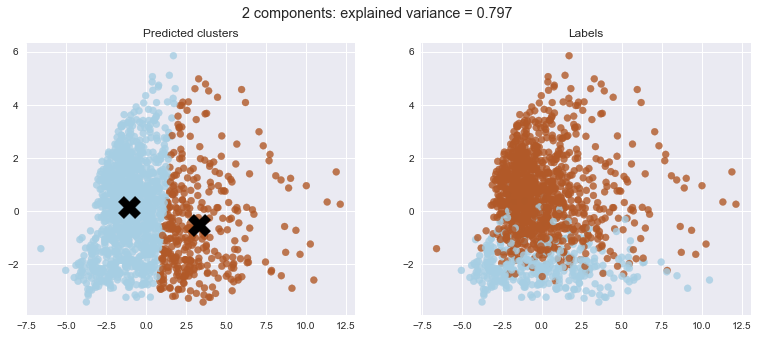

In [66]:
# Import the PCA algorithm
from sklearn.decomposition import PCA

# Number of PCA components
components = 2

# Number of clusters
K = 2

# Initialise the PCA algorithm
pca = PCA(n_components=components)

# Fit and transform the PCA on the dataset
pca.fit(X_train_scaled) 
X_train_pca = pca.transform(X_train_scaled)

# Initialise the K-means algorithm
kmeans = KMeans(n_clusters=K, random_state=seed)

# Fit the on the transformed dataset
kmeans.fit(X_train_pca) 

# Predict / assign the examples to a cluster
y_pred = kmeans.predict(X_train_pca)

# Generate plots
plt.figure(figsize=(13, 5))
plt.suptitle('%d components: explained variance = %.3f' % (components, np.sum(pca.explained_variance_ratio_)))

# Predicted clusters
plt.subplot(1, 2, 1)
plt.title('Predicted clusters')
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], alpha=0.8, c=y_pred, cmap=plt.cm.Paired) 
# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='X', s=500, c='black')

# Real labels
plt.subplot(1, 2, 2)
plt.title('Labels')
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], alpha=0.8, c=y_train, cmap=plt.cm.Paired) 
plt.show()

Similar to before, the generated clusters doesn't really match up with our labelled data. That's fine but let's examine how much variance is explained by the two principal components.

In [67]:
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[ 0.52533189  0.27171191]
0.797043799016


The components are able to explain 52% and 27% of the variance in the dataset respectively. The first two components explain a total of 79% variance of the dataset. 

We can also evaluate the weights of the principal components with our features. Here, we are interested in the absolute values of the weights. Let's calculate percentages so it is easier to see which features contribute the most for each component.

In [68]:
# Total sum of each component
component_totals = np.sum(np.abs(pca.components_), axis=1)

# Calculate the percentage for each component and feature 
component_percentage = np.abs(pca.components_) / component_totals.reshape(2, 1) * 100
components_df = pd.DataFrame(component_percentage, columns=features).round(2)

components_df

,redshift,mag_u,mag_g,mag_r,mag_i,mag_z,deVRad_r,deVAB_r,expRad_r,expAB_r,stellar_mass
0,9.84,13.22,13.88,13.32,13.02,12.63,8.56,1.73,10.28,0.92,2.59
1,9.56,0.64,2.61,5.72,6.29,6.73,10.46,17.08,9.25,17.14,14.50


We see that the magnitudes contribute the most for the first principal component. Their values range from 12.62% to 13.96% for a total of 66.26%. The second component has the most contribution from the `deVAB_r` (16.73%), `expAB_r` (16.77%) and `stellar_mass` (14.41%) features. 

This table is a bit difficult to read so let's create a heatmap plot based on its values.

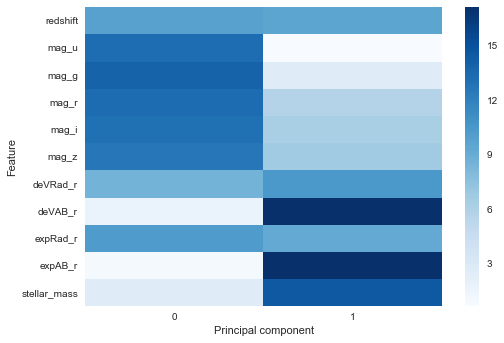

In [69]:
# Transpose the dataframe to make it easier to read the feature names
sb.heatmap(components_df.T, cmap='Blues')
plt.ylabel('Feature')
plt.xlabel('Principal component')
plt.show()

That's much easier to identify the contribution of the features for each of the components. Now, let's find out how many components is required to explain 99% of the variance in the dataset.

[ 0.52533189  0.7970438   0.89819551  0.97708136  0.9894212   0.99512828
  0.99846861  0.99925689  0.99983352  0.99992537  1.        ]


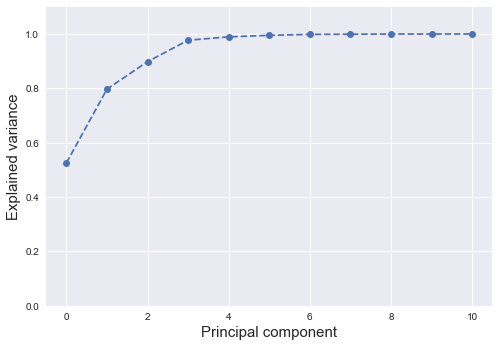

In [70]:
# Initialise the algorithm
# PCA keeps all components by default if you don't pass the argument n_components 
pca = PCA(random_state=seed)

# Fit the PCA on the dataset
pca.fit(X_train_scaled) 

# Calculate the cumulative sum of the explained variance of each component
print(pca.explained_variance_ratio_.cumsum())

# Plot the chart showing the explained variance ratio
plt.ylim(0, 1.1)
plt.xlabel('Principal component', fontsize=15)
plt.ylabel('Explained variance', fontsize=15)
plt.plot(pca.explained_variance_ratio_.cumsum(), '--o')
plt.show()

We are able to explain 99% of the variance in the dataset we reach the 6th principal component. 

Based on this result, we could transform our feature set using these 6 principal components without losing much information. This is particularly useful when we are imposed with engineering requirements where we may be required to reduce the training / prediction time of our models and the storage of our datasets.

### Preprocessing
Let's use PCA as a preprocessing step for training a Logistic Regression model. Recall that PCA should only be fitted on the training dataset (`X_train`). The fitted model however will be used to transform both training and testing datasets. We can also experiment with the number of principal components used for transforming the datasets. 

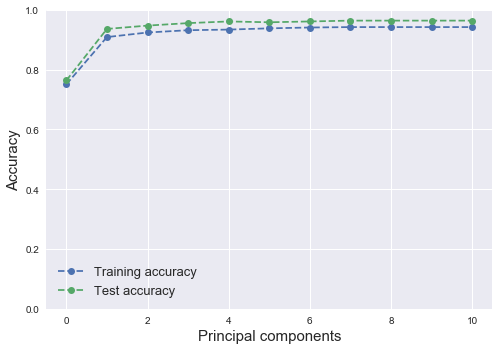

Train: ['0.751', '0.909', '0.924', '0.932', '0.934', '0.938', '0.941', '0.942', '0.942', '0.942', '0.942']
Test: ['0.764', '0.936', '0.947', '0.956', '0.961', '0.958', '0.961', '0.964', '0.964', '0.964', '0.964']


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialise the PCA algorithm
pca = PCA()

# Fit PCA model on the scaled training dataset
pca.fit(X_train_scaled) 

# Use PCA to transform the scaled training and test datasets
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Principal components list
# 1 to 11
top_k_values = range(1, len(features) + 1)

train_scores = []
test_scores = []

for top_k in top_k_values:
    # Build the feature sets based on the top_k components
    X_train_features = X_train_pca[:, 0:top_k]
    X_test_features = X_test_pca[:, 0:top_k]

    # Initialise our model
    logreg_pca = LogisticRegression(random_state=seed)

    # Fit the model
    logreg_pca.fit(X_train_features, y_train)
    
    # Generate predictions
    y_train_pred = logreg_pca.predict(X_train_features)
    y_test_pred = logreg_pca.predict(X_test_features)
    
    # Calculate the scores
    train_scores.append(accuracy_score(y_train, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

# Plot the chart showing the explained variance ratio
plt.xlabel('Principal components', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.ylim(0, 1)
plt.plot(train_scores, '--o', label='Training accuracy')
plt.plot(test_scores, '--o', label='Test accuracy')
plt.legend(fontsize=13)
plt.show()

# Print results to two decimal places
print('Train: %s' % (['%.3f' % x for x in train_scores]))
print('Test: %s' % (['%.3f' % x for x in test_scores]))

How does the performance of using the full feature set compare with using the PCA components? What is the number of components achieved the best performance in your experiments?

In [72]:
# SOLUTIONS NOTEBOOK ONLY

# Initialise the model
logreg = LogisticRegression(random_state=seed)

# Fit the model using the scaled training dataset
logreg.fit(X_train_scaled, y_train)

# Generate predictions
y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)

# Calculate scores
print('Training accuracy: %.2f' % (accuracy_score(y_train, y_train_pred)))
print('Test accuracy: %.2f' % (accuracy_score(y_test, y_test_pred)))

Training accuracy: 0.94
Test accuracy: 0.96


## 10. Reproducibility

[[ go back to the top ]](#Table-of-contents)

Ensuring your work is reproducible is an important step in any analysis. **As a rule, we shouldn't place much weight on a discovery that can't be reproduced**.

Notebooks like this one go a long way toward making our work reproducible. Since we documented every step as we moved along, we have a written record of what we did and why we did it — both in text and code.

## 11. Conclusions

[[ go back to the top ]](#Table-of-contents)

We hope you found this example notebook useful for your own work and learned at least one new trick by reading through it.

If you've spotted any errors or would like to contribute to this notebook, please don't hestitate to get in touch. We can be reached in the following ways:

* E-mail us

* [Submit an issue](https://github.com/CurtinIC/cic-ml-workshop/issues) on GitHub

* Fork the [notebook repository](https://github.com/CurtinIC/cic-ml-workshop), make the fix/addition yourself, then send over a pull request

## 12. Further reading

[[ go back to the top ]](#Table-of-contents)

This notebook covers a broad variety of topics but skips over many of the specifics. If you're looking to dive deeper into a particular topic, here's some recommended reading.

**Data Science**: William Chen compiled a [list of free books](http://www.wzchen.com/data-science-books/) for newcomers to Data Science, ranging from the basics of R & Python to Machine Learning to interviews and advice from prominent data scientists.

**Machine Learning**: /r/MachineLearning has a useful [Wiki page](https://www.reddit.com/r/MachineLearning/wiki/index) containing links to online courses, books, data sets, etc. for Machine Learning. There's also a [curated list](https://github.com/josephmisiti/awesome-machine-learning) of Machine Learning frameworks, libraries, and software sorted by language.

**scikit-learn** has a [bunch of tutorials](http://scikit-learn.org/stable/tutorial/index.html) for those looking to learn Machine Learning in Python. Andreas Mueller's [scikit-learn workshop materials](https://github.com/amueller/scipy_2015_sklearn_tutorial) are top-notch and freely available.

**pandas** has [several tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) covering its myriad features.

**matplotlib** has many [books, videos, and tutorials](http://matplotlib.org/resources/index.html) to teach plotting in Python.

**Seaborn** has a [basic tutorial](http://stanford.edu/~mwaskom/software/seaborn/tutorial.html) covering most of the statistical plotting features.